# Density-based clustering

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files # Colab library to upload files to notebook

# Install kaggle package so that we can use the kaggle api e.g. for downloading data.  
!pip install kaggle

# Upload kaggle API key file
uploaded = files.upload()

!mkdir '/root/.kaggle'
!cp 'kaggle.json' '/root/.kaggle/.'
!chmod 600 '/root/.kaggle/kaggle.json'

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d mashlyn/online-retail-ii-uci # Download the data from the competition.
!unzip online-retail-ii-uci.zip

 62% 9.00M/14.5M [00:00<00:00, 29.8MB/s]
100% 14.5M/14.5M [00:00<00:00, 45.4MB/s]
Archive:  online-retail-ii-uci.zip
  inflating: online_retail_II.csv    


In [ ]:
df = pd.read_csv('online_retail_II.csv')

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
df = df.dropna()

In [ ]:
invalid_codes = [item for item in set(df['StockCode']) if not item[0].isdigit()]
invalid_codes

['M',
 'C2',
 'CRUK',
 'TEST002',
 'DOT',
 'ADJUST',
 'BANK CHARGES',
 'SP1002',
 'TEST001',
 'D',
 'POST',
 'ADJUST2',
 'PADS']

In [ ]:
df = df[~df['StockCode'].isin(invalid_codes)]

In [ ]:
france_df = df[df['Country'] == 'France']
france_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
71,489439,22065,CHRISTMAS PUDDING TRINKET POT,12,2009-12-01 09:28:00,1.45,12682.0,France
72,489439,22138,BAKING SET 9 PIECE RETROSPOT,9,2009-12-01 09:28:00,4.95,12682.0,France
73,489439,22139,RETRO SPOT TEA SET CERAMIC 11 PC,9,2009-12-01 09:28:00,4.95,12682.0,France
74,489439,22352,LUNCHBOX WITH CUTLERY RETROSPOT,12,2009-12-01 09:28:00,2.55,12682.0,France
75,489439,85014A,BLACK/BLUE DOTS RUFFLED UMBRELLA,3,2009-12-01 09:28:00,5.95,12682.0,France
...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
transactions = pd.get_dummies(france_df[['Invoice', 'StockCode']], columns=['StockCode']).groupby('Invoice').any()

In [ ]:
transactions

,StockCode_10002,StockCode_10120,StockCode_10123C,StockCode_10123G,StockCode_10125,StockCode_10135,StockCode_11001,StockCode_15036,StockCode_15039,StockCode_15044C,...,StockCode_90184B,StockCode_90184C,StockCode_90201B,StockCode_90201C,StockCode_90208,StockCode_90209A,StockCode_90214C,StockCode_90214E,StockCode_90214L,StockCode_90214S
Invoice,,,,,,,,,,,,,,,,,,,,,
489439,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
489557,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
489883,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
490139,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
490152,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C579192,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
C579532,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
C579562,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
transactions.sum(axis=0).describe()

count    2002.000000
mean        6.671329
std        12.156109
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       132.000000
dtype: float64

# DB-SCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
#model = DBSCAN(min_samples=3, eps=1, metric='cityblock')
model = DBSCAN(min_samples=3, eps=0.5, metric='cosine')
model.fit(transactions)

DBSCAN(metric='cosine', min_samples=3)

In [ ]:
model.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1,  1, -1,  2, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        4, -1, -1,  0, -1, -1,  3, -1, -1, -1,  1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1,  0,  4, 18, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  9, -1,  2, -1, -1, -1, -1,  3, -1, 16,  2, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  2, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1,  4, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1,  2, -1,  5,  5, -1,  2, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, 17, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  6, -1,
       -1, -1, -1, -1, -1

(array([576.,  20.,   9.,   7.,   3.,   4.,   3.,   7.,  12.,   3.,   9.,
          3.,   3.,   3.,   3.,   3.,  22.,   4.,   4.,   3.]),
 array([-1.  , -0.05,  0.9 ,  1.85,  2.8 ,  3.75,  4.7 ,  5.65,  6.6 ,
         7.55,  8.5 ,  9.45, 10.4 , 11.35, 12.3 , 13.25, 14.2 , 15.15,
        16.1 , 17.05, 18.  ]),
 <a list of 20 Patch objects>)

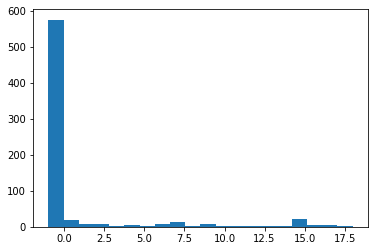

In [ ]:
import matplotlib.pyplot as plt
plt.hist(model.labels_, bins=len(set(model.labels_)))

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
transactions_2d = pca.fit_transform(transactions)

In [ ]:
from matplotlib import pyplot as plt

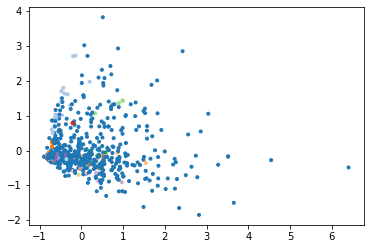

In [ ]:
plt.scatter(x=transactions_2d[:,0], y=transactions_2d[:,1], marker='.', c=model.labels_, cmap='tab20')

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2)

In [ ]:
transactions_tsne = tsne.fit_transform(transactions)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


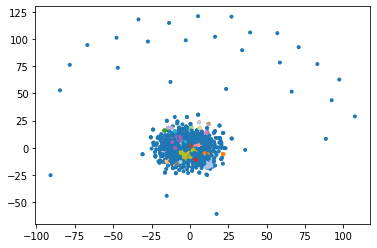

In [ ]:
plt.scatter(x=transactions_tsne[:,0], y=transactions_tsne[:,1], marker='.', c=model.labels_, cmap='tab20')

DBSCAN eps metric and min_samples are hyperparameters you need to try just like in distance-based.

It's expected to have some unclusterable groups in your data (-1 labels).

Let's try removing the noise cluster and replot.

In [ ]:
non_noise = transactions_2d[model.labels_ >= 0]
non_noise_labels = model.labels_[model.labels_ >= 0]

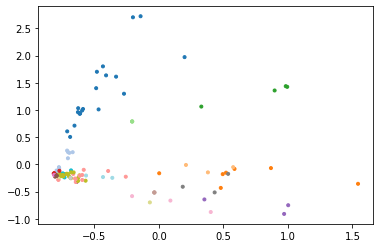

In [ ]:
plt.scatter(x=non_noise[:,0], y=non_noise[:,1], marker='.', c=non_noise_labels, cmap='tab20')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


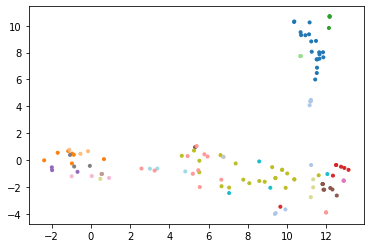

In [ ]:
tsne = TSNE(n_components=2)
non_noise_tsne = tsne.fit_transform(non_noise)
plt.scatter(x=non_noise_tsne[:,0], y=non_noise_tsne[:,1], marker='.', c=non_noise_labels, cmap='tab20')

Let's analyze the first cluster.

In [ ]:
import numpy as np

In [ ]:
transactions.iloc[np.where(model.labels_ == 0)]

,StockCode_10002,StockCode_10120,StockCode_10123C,StockCode_10123G,StockCode_10125,StockCode_10135,StockCode_11001,StockCode_15036,StockCode_15039,StockCode_15044C,...,StockCode_90184B,StockCode_90184C,StockCode_90201B,StockCode_90201C,StockCode_90208,StockCode_90209A,StockCode_90214C,StockCode_90214E,StockCode_90214L,StockCode_90214S
Invoice,,,,,,,,,,,,,,,,,,,,,
502636,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
504709,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
507697,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
510651,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
511825,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
521373,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
525249,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
533548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
534696,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
sets = transactions.iloc[np.where(model.labels_ == 0)].index
sets

Index(['502636', '504709', '507697', '510651', '511825', '521373', '525249',
       '533548', '534696', '543459', '546765', '547087', '552464', '555941',
       '558334', '559685', '562520', '562894', '566736', '575880'],
      dtype='object', name='Invoice')

In [ ]:
# only a few stock item is bought in this cluster
ransactions.iloc[np.where(model.labels_ == 0)].sum() > 0

StockCode_10002      True
StockCode_10120     False
StockCode_10123C    False
StockCode_10123G    False
StockCode_10125     False
                    ...  
StockCode_90209A    False
StockCode_90214C    False
StockCode_90214E    False
StockCode_90214L    False
StockCode_90214S    False
Length: 2002, dtype: bool

In [ ]:
# only get the items that are bought in cluster 0
codes = transactions.columns[transactions.iloc[np.where(model.labels_ == 0)].sum() > 0]
codes

Index(['StockCode_10002', 'StockCode_20675', 'StockCode_20676',
       'StockCode_20677', 'StockCode_20750', 'StockCode_20941',
       'StockCode_20975', 'StockCode_20977', 'StockCode_20979',
       'StockCode_20983', 'StockCode_21077', 'StockCode_21080',
       'StockCode_21086', 'StockCode_21094', 'StockCode_21121',
       'StockCode_21122', 'StockCode_21123', 'StockCode_21124',
       'StockCode_21125', 'StockCode_21126', 'StockCode_21153',
       'StockCode_21207', 'StockCode_21212', 'StockCode_21213',
       'StockCode_21219', 'StockCode_21243', 'StockCode_21244',
       'StockCode_21498', 'StockCode_21544', 'StockCode_21679',
       'StockCode_21731', 'StockCode_21746', 'StockCode_21749',
       'StockCode_21791', 'StockCode_21829', 'StockCode_21843',
       'StockCode_21883', 'StockCode_21888', 'StockCode_21912',
       'StockCode_21913', 'StockCode_21987', 'StockCode_21988',
       'StockCode_21989', 'StockCode_22080', 'StockCode_22082',
       'StockCode_22090', 'StockCode_221

In [ ]:
transactions.iloc[np.where(model.labels_ == 0)][codes]

,StockCode_10002,StockCode_20675,StockCode_20676,StockCode_20677,StockCode_20750,StockCode_20941,StockCode_20975,StockCode_20977,StockCode_20979,StockCode_20983,...,StockCode_22745,StockCode_22746,StockCode_22908,StockCode_22964,StockCode_23229,StockCode_23382,StockCode_40018F,StockCode_84378,StockCode_85173,StockCode_85175
Invoice,,,,,,,,,,,,,,,,,,,,,
502636,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
504709,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
507697,True,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,True,False,False
510651,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
511825,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
521373,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
525249,False,False,False,False,True,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
533548,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
534696,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
# let's look at cluster 0
df[df['Invoice'].isin(sets)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
138453,502636,21544,SKULLS WATER TRANSFER TATTOOS,36,2010-03-25 16:25:00,0.85,12726.0,France
138454,502636,21791,VINTAGE HEADS AND TAILS CARD GAME,24,2010-03-25 16:25:00,1.25,12726.0,France
138455,502636,21124,SET/10 BLUE SPOTTY PARTY CANDLES,48,2010-03-25 16:25:00,1.25,12726.0,France
138456,502636,21122,SET/10 PINK SPOTTY PARTY CANDLES,48,2010-03-25 16:25:00,1.25,12726.0,France
138457,502636,21121,SET/10 RED SPOTTY PARTY CANDLES,48,2010-03-25 16:25:00,1.25,12726.0,France
...,...,...,...,...,...,...,...,...
985291,575880,22549,PICTURE DOMINOES,12,2011-11-11 13:35:00,1.45,12726.0,France
985292,575880,21791,VINTAGE HEADS AND TAILS CARD GAME,12,2011-11-11 13:35:00,1.25,12726.0,France
985293,575880,21888,BINGO SET,4,2011-11-11 13:35:00,3.75,12726.0,France
985294,575880,23229,VINTAGE DONKEY TAIL GAME,6,2011-11-11 13:35:00,3.75,12726.0,France


In [ ]:
for invoice in sets:
    print('Invoice {}'.format(invoice))
    print('\n'.join(df[df['Invoice'] == invoice]['Description'].values.reshape(-1)))
    print()

Invoice 502636
SKULLS  WATER TRANSFER TATTOOS 
VINTAGE HEADS AND TAILS CARD GAME 
SET/10 BLUE SPOTTY PARTY CANDLES
SET/10 PINK SPOTTY PARTY CANDLES
SET/10 RED SPOTTY PARTY CANDLES
SET/6 RED SPOTTY PAPER CUPS
SET/6 RED SPOTTY PAPER PLATES
SET/20 RED SPOTTY PAPER NAPKINS 
MINI JIGSAW SPACEBOY

Invoice 504709
SET/6 RED SPOTTY PAPER CUPS
SET/6 RED SPOTTY PAPER PLATES
MINI JIGSAW CIRCUS PARADE 
MINI JIGSAW SPACEBOY
MINI JIGSAW DINOSAUR 

Invoice 507697
PAPER BUNTING RETRO SPOTS
SET/6 RED SPOTTY PAPER CUPS
SKULL AND CROSSBONES  GARLAND 
PACK OF 6 SKULL PAPER CUPS
PACK OF 20 SKULL PAPER NAPKINS
SET/20 WOODLAND PAPER NAPKINS 
SET/6 RED SPOTTY PAPER PLATES
PACK OF 6 SKULL PAPER PLATES
SET OF 9 BLACK SKULL BALLOONS
SET OF 9 HEART SHAPED BALLOONS
SET/20 RED SPOTTY PAPER NAPKINS 
INFLATABLE POLITICAL GLOBE 
JIGSAW TREE WITH WATERING CAN
PACK OF 72 RETRO SPOT CAKE CASES
PACK OF 72 SKULL CAKE CASES
SET OF 3 HEART COOKIE CUTTERS
SET/10 RED SPOTTY PARTY CANDLES
CHERRY DESIGN PAPERLANTERNS
12 PENCILS S

From the looks of it, they buy paper cups, paper plates, candles. This might be a cluster of customers buying for party supplies.

You can try looking at other clusters and try to extract insights.